In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

DATA_PATH = "/content/drive/MyDrive/Final_project/data/"
SEED = 42

In [3]:
reset_seeds(SEED)

In [4]:
df = pd.read_csv(f"{DATA_PATH}아모레크롤링_스킨케어.csv")
df

,상품분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰
0,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,0103*******,5,2022.09.27,40대,여성,지성,모공,남편이 극지성이에요. 원래 수퍼화산송이 미셀라만 꾸준히 사용해 오다가 지성 전용이라...
1,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,lsm2***,5,2022.08.15,40대,여성,건성,건조함,여름이라 집에 와서 메이크업 클렌징 해줄때 꼭 이중세안 해주는데 이 폼 클렌징으로 ...
2,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,gpdl***,5,2022.12.24,20대,여성,복합성,트러블,이니스프리 폼클렌징은 피부에 자극적이지 않아 좋아요 선크림만 사용해도 꼭 폼까지 써...
3,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,zoll***,5,2022.09.30,30대,여성,건성,건조함,저희 엄마가 이 제품이 클렌징이 제일 잘된다고 좋아하서 1+1 이벤트하길래 4개 쟁...
4,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,snow****,5,2022.09.30,50대 이상,여성,지성,모공,여름이라서 모공이 넓어지는것 같아서 구매해서 사용해보니 촉촉하고 피부땡기지 않아서 ...
...,...,...,...,...,...,...,...,...,...,...,...
112763,스킨케어,프리메라,모이스처 클렌징 티슈 300g,drea****,5,2020.01.11,40대,여성,복합성,모공,자극적이지 않고 순하게 화장을 지워주어 좋아요.
112764,스킨케어,프리메라,모이스처 클렌징 티슈 300g,kim4***,5,2022.05.11,50대 이상,여성,복합성,칙칙함,순하고 화장도 잘지워지고 기름지지않아서 좋아요 ~~^^
112765,스킨케어,프리메라,모이스처 클렌징 티슈 300g,hyej*****,4,2022.04.12,40대,여성,수분부족지성,탄력없음,클렌징티슈는 이것만 사용해요 자극 덜하고 향도 좋아요~
112766,스킨케어,프리메라,모이스처 클렌징 티슈 300g,sooh*****,4,2019.08.31,40대,여성,수분부족지성,모공,제 인생템 중 하나입니다 없으면 불안해져 쟁여놓고 쓴답니다~


In [5]:
# 제품별 평균 평점과 리뷰 수 계산
product_rating_avg = df.groupby('상품명')['별점'].mean()
product_rating_count = df.groupby('상품명').size()

In [6]:
product_rating_count.describe()

count    491.000000
mean     229.670061
std      237.347608
min        8.000000
25%       49.000000
50%      130.000000
75%      335.000000
max      932.000000
dtype: float64

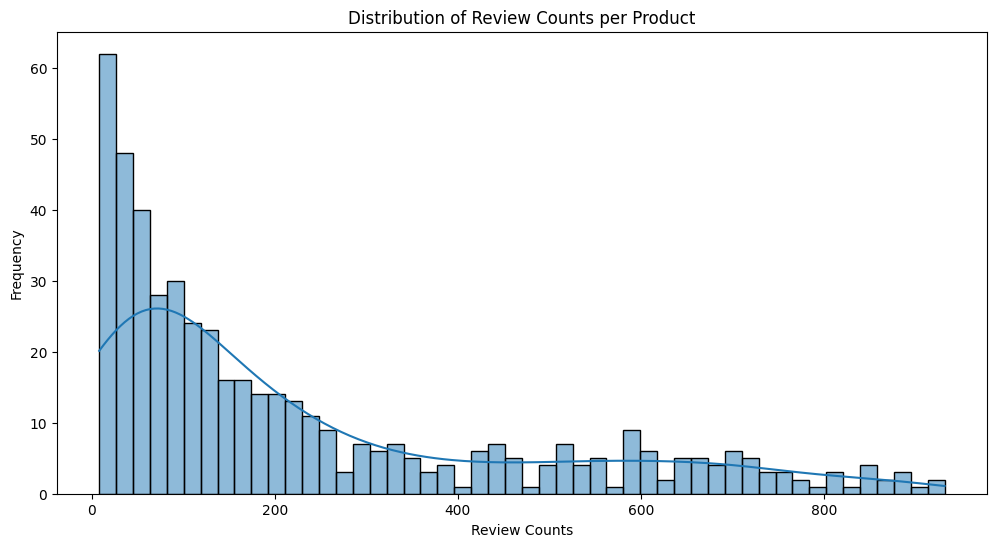

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 리뷰 수 분포 그래프 그리기
plt.figure(figsize=(12, 6))
sns.histplot(product_rating_count, bins=50, kde=True)
plt.title('Distribution of Review Counts per Product')
plt.xlabel('Review Counts')
plt.ylabel('Frequency')
plt.show()

In [7]:
# 가중 평점 계산
m = product_rating_count.quantile(0.6)
C = product_rating_avg.mean()
product_weighted_rating = (product_rating_count / (product_rating_count + m) * product_rating_avg) + (m / (product_rating_count + m) * C)

In [8]:
# 가중 평점을 데이터프레임에 추가
df['가중평점'] = df['상품명'].map(product_weighted_rating)
df

,상품분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰,가중평점
0,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,0103*******,5,2022.09.27,40대,여성,지성,모공,남편이 극지성이에요. 원래 수퍼화산송이 미셀라만 꾸준히 사용해 오다가 지성 전용이라...,4.764849
1,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,lsm2***,5,2022.08.15,40대,여성,건성,건조함,여름이라 집에 와서 메이크업 클렌징 해줄때 꼭 이중세안 해주는데 이 폼 클렌징으로 ...,4.764849
2,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,gpdl***,5,2022.12.24,20대,여성,복합성,트러블,이니스프리 폼클렌징은 피부에 자극적이지 않아 좋아요 선크림만 사용해도 꼭 폼까지 써...,4.764849
3,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,zoll***,5,2022.09.30,30대,여성,건성,건조함,저희 엄마가 이 제품이 클렌징이 제일 잘된다고 좋아하서 1+1 이벤트하길래 4개 쟁...,4.764849
4,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,snow****,5,2022.09.30,50대 이상,여성,지성,모공,여름이라서 모공이 넓어지는것 같아서 구매해서 사용해보니 촉촉하고 피부땡기지 않아서 ...,4.764849
...,...,...,...,...,...,...,...,...,...,...,...,...
112763,스킨케어,프리메라,모이스처 클렌징 티슈 300g,drea****,5,2020.01.11,40대,여성,복합성,모공,자극적이지 않고 순하게 화장을 지워주어 좋아요.,4.776748
112764,스킨케어,프리메라,모이스처 클렌징 티슈 300g,kim4***,5,2022.05.11,50대 이상,여성,복합성,칙칙함,순하고 화장도 잘지워지고 기름지지않아서 좋아요 ~~^^,4.776748
112765,스킨케어,프리메라,모이스처 클렌징 티슈 300g,hyej*****,4,2022.04.12,40대,여성,수분부족지성,탄력없음,클렌징티슈는 이것만 사용해요 자극 덜하고 향도 좋아요~,4.776748
112766,스킨케어,프리메라,모이스처 클렌징 티슈 300g,sooh*****,4,2019.08.31,40대,여성,수분부족지성,모공,제 인생템 중 하나입니다 없으면 불안해져 쟁여놓고 쓴답니다~,4.776748


In [9]:
# 가상 유저 생성
df['가상유저'] = df['나이'] + ',' + df['성별'] + ',' + df['피부타입'] + ',' + df['피부트러블']
df

,상품분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰,가중평점,가상유저
0,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,0103*******,5,2022.09.27,40대,여성,지성,모공,남편이 극지성이에요. 원래 수퍼화산송이 미셀라만 꾸준히 사용해 오다가 지성 전용이라...,4.764849,"40대,여성,지성,모공"
1,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,lsm2***,5,2022.08.15,40대,여성,건성,건조함,여름이라 집에 와서 메이크업 클렌징 해줄때 꼭 이중세안 해주는데 이 폼 클렌징으로 ...,4.764849,"40대,여성,건성,건조함"
2,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,gpdl***,5,2022.12.24,20대,여성,복합성,트러블,이니스프리 폼클렌징은 피부에 자극적이지 않아 좋아요 선크림만 사용해도 꼭 폼까지 써...,4.764849,"20대,여성,복합성,트러블"
3,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,zoll***,5,2022.09.30,30대,여성,건성,건조함,저희 엄마가 이 제품이 클렌징이 제일 잘된다고 좋아하서 1+1 이벤트하길래 4개 쟁...,4.764849,"30대,여성,건성,건조함"
4,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,snow****,5,2022.09.30,50대 이상,여성,지성,모공,여름이라서 모공이 넓어지는것 같아서 구매해서 사용해보니 촉촉하고 피부땡기지 않아서 ...,4.764849,"50대 이상,여성,지성,모공"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112763,스킨케어,프리메라,모이스처 클렌징 티슈 300g,drea****,5,2020.01.11,40대,여성,복합성,모공,자극적이지 않고 순하게 화장을 지워주어 좋아요.,4.776748,"40대,여성,복합성,모공"
112764,스킨케어,프리메라,모이스처 클렌징 티슈 300g,kim4***,5,2022.05.11,50대 이상,여성,복합성,칙칙함,순하고 화장도 잘지워지고 기름지지않아서 좋아요 ~~^^,4.776748,"50대 이상,여성,복합성,칙칙함"
112765,스킨케어,프리메라,모이스처 클렌징 티슈 300g,hyej*****,4,2022.04.12,40대,여성,수분부족지성,탄력없음,클렌징티슈는 이것만 사용해요 자극 덜하고 향도 좋아요~,4.776748,"40대,여성,수분부족지성,탄력없음"
112766,스킨케어,프리메라,모이스처 클렌징 티슈 300g,sooh*****,4,2019.08.31,40대,여성,수분부족지성,모공,제 인생템 중 하나입니다 없으면 불안해져 쟁여놓고 쓴답니다~,4.776748,"40대,여성,수분부족지성,모공"


In [10]:
# 각 가상 유저별 리뷰 수 계산
user_review_counts = df['가상유저'].value_counts()

# 기초 통계량 살펴보기
user_review_counts.describe()

count     386.000000
mean      292.145078
std       538.657986
min         1.000000
25%        20.000000
50%        92.000000
75%       251.750000
max      4045.000000
Name: 가상유저, dtype: float64

In [11]:
# 가상 유저와 상품명을 ID로 변환
user_to_id = {user: i for i, user in enumerate(df['가상유저'].unique())}
product_to_id = {product: j for j, product in enumerate(df['상품명'].unique())}
df['user_id'] = df['가상유저'].map(user_to_id)
df['product_id'] = df['상품명'].map(product_to_id)

In [12]:
# 가상유저별 총 구매횟수를 계산
user_total_purchase_count = df.groupby('가상유저').size().reset_index(name='총구매횟수')

# 구매횟수를 기반으로 10%씩 묶어 클래스를 생성
user_total_purchase_count['구매_클래스'] = pd.qcut(user_total_purchase_count['총구매횟수'], 10, labels=False)

# 원본 데이터에 구매 클래스 정보 추가
df = pd.merge(df, user_total_purchase_count[['가상유저', '구매_클래스']], on='가상유저', how='left')

df.head()

,상품분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰,가중평점,가상유저,user_id,product_id,구매_클래스
0,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,0103*******,5,2022.09.27,40대,여성,지성,모공,남편이 극지성이에요. 원래 수퍼화산송이 미셀라만 꾸준히 사용해 오다가 지성 전용이라...,4.764849,"40대,여성,지성,모공",0,0,7
1,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,lsm2***,5,2022.08.15,40대,여성,건성,건조함,여름이라 집에 와서 메이크업 클렌징 해줄때 꼭 이중세안 해주는데 이 폼 클렌징으로 ...,4.764849,"40대,여성,건성,건조함",1,0,9
2,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,gpdl***,5,2022.12.24,20대,여성,복합성,트러블,이니스프리 폼클렌징은 피부에 자극적이지 않아 좋아요 선크림만 사용해도 꼭 폼까지 써...,4.764849,"20대,여성,복합성,트러블",2,0,9
3,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,zoll***,5,2022.09.30,30대,여성,건성,건조함,저희 엄마가 이 제품이 클렌징이 제일 잘된다고 좋아하서 1+1 이벤트하길래 4개 쟁...,4.764849,"30대,여성,건성,건조함",3,0,9
4,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,snow****,5,2022.09.30,50대 이상,여성,지성,모공,여름이라서 모공이 넓어지는것 같아서 구매해서 사용해보니 촉촉하고 피부땡기지 않아서 ...,4.764849,"50대 이상,여성,지성,모공",4,0,5


In [13]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df,test_size=0.2,random_state=SEED,stratify=df['구매_클래스'])
train_df.shape, test_df.shape

((90214, 16), (22554, 16))

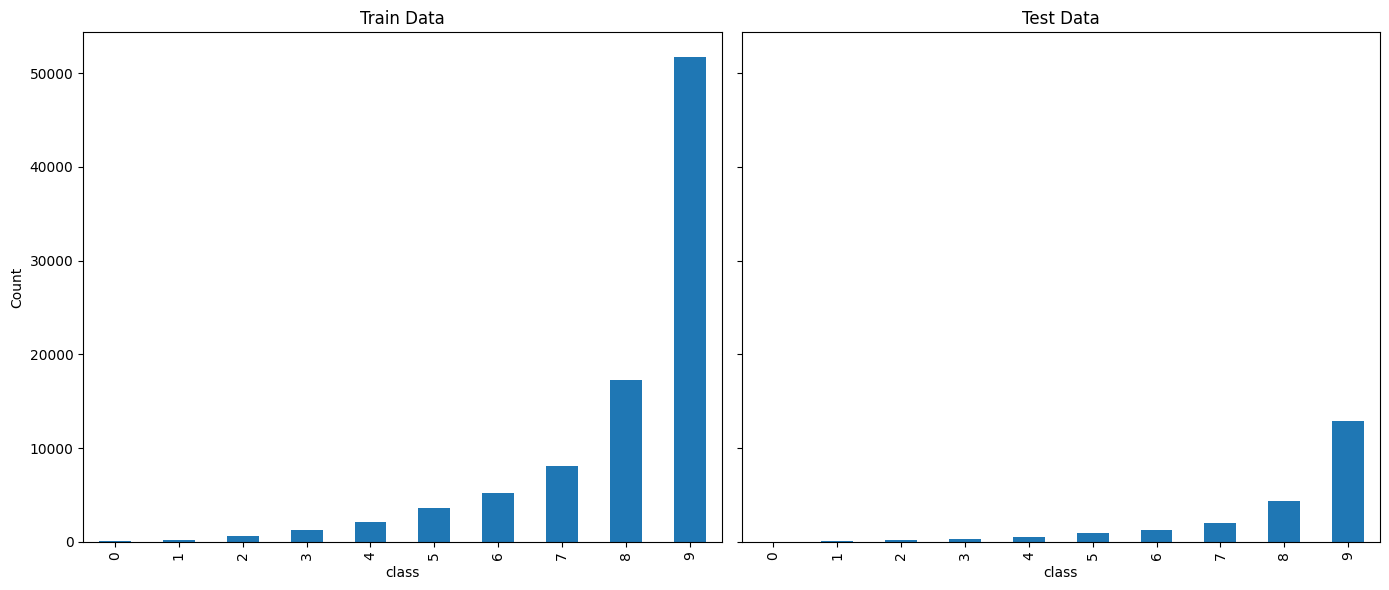

In [14]:
import matplotlib.pyplot as plt

# 학습 데이터와 테스트 데이터에서의 '구매_클래스' 분포를 그래프로 표현
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

train_df['구매_클래스'].value_counts().sort_index().plot(kind='bar', ax=axes[0], title='Train Data')
test_df['구매_클래스'].value_counts().sort_index().plot(kind='bar', ax=axes[1], title='Test Data')

axes[0].set_xlabel('class')
axes[0].set_ylabel('Count')
axes[1].set_xlabel('class')

plt.tight_layout()
plt.show()


In [15]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3156232 sha256=1a13e7ce81315e08e6d86ad7e64f159a5fd5a77de17953444c05cc514c6e74fb
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [16]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection.search import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_epochs': [5, 10, 20, 40, 60, 80, 100],  # 에폭 수
    'lr_all': [0.002, 0.005, 0.01],  # 학습률
    'reg_all': [0.2, 0.4, 0.6]  # 정규화 항
}

# Reader 객체 생성
reader = Reader(rating_scale=(0, 5))

# 학습 데이터와 테스트 데이터를 surprise의 데이터 형식으로 변환
train_data_surprise = Dataset.load_from_df(train_df[['user_id', 'product_id', '가중평점']], reader)
trainset = train_data_surprise.build_full_trainset()

# 테스트 데이터를 surprise의 데이터 형식으로 변환
testset = [(row['user_id'], row['product_id'], row['가중평점']) for i, row in test_df.iterrows()]

In [18]:
# GridSearchCV 객체 생성
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5, n_jobs=-1)

# 데이터셋에 적합
data_surprise = Dataset.load_from_df(df[['user_id', 'product_id', '가중평점']], reader)
gs.fit(data_surprise)

# 최적의 파라미터 얻기
best_params = gs.best_params['rmse']

best_params

KeyboardInterrupt: ignored

In [17]:
best_params = {'n_epochs': 100, 'lr_all': 0.005, 'reg_all': 0.2}

In [18]:
# SVD 알고리즘 사용하여 모델 학습
model = SVD(n_epochs=best_params['n_epochs'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'],random_state=SEED)
model.fit(trainset)

# 테스트 데이터에 대한 예측
predictions = model.test(testset)

# 평가 (RMSE)
rmse = accuracy.rmse(predictions)

RMSE: 0.0070


In [19]:
df[['user_id', 'product_id', '가중평점']]

,user_id,product_id,가중평점
0,0,0,4.764849
1,1,0,4.764849
2,2,0,4.764849
3,3,0,4.764849
4,4,0,4.764849
...,...,...,...
112763,11,490,4.776748
112764,62,490,4.776748
112765,32,490,4.776748
112766,35,490,4.776748


In [23]:
# id_to_user = {v: k for k, v in user_to_id.items()}
# id_to_product = {v: k for k, v in product_to_id.items()}

# def get_top_n_recommendations(predictions, n=10):
#     top_n = {}
#     for uid, iid, est in predictions:
#         user_info = id_to_user[uid]
#         product_name = id_to_product[iid]
#         top_n.setdefault(user_info, []).append((product_name, est))

#     for user_info, user_ratings in top_n.items():
#         user_ratings.sort(key=lambda x: x[1], reverse=True)
#         top_n[user_info] = user_ratings[:n]

#     return top_n

# # user_recommendations = get_top_n_recommendations(predictions, n=5)

In [33]:
# id_to_user = {v: k for k, v in user_to_id.items()}
# id_to_product = {v: k for k, v in product_to_id.items()}

# def get_top_n_recommendations(predictions, n=10):
#     top_n = {}
#     for uid, iid, true_r, est, _ in predictions:
#         user_info = id_to_user[uid]
#         product_name = id_to_product[iid]
#         top_n.setdefault(user_info, []).append((product_name, est))

#     for user_info, user_ratings in top_n.items():
#         user_ratings.sort(key=lambda x: x[1], reverse=True)
#         top_n[user_info] = user_ratings[:n]

#     return top_n

# # user_recommendations = get_top_n_recommendations(predictions, n=5)

In [20]:
id_to_user = {v: k for k, v in user_to_id.items()}
id_to_product = {v: k for k, v in product_to_id.items()}

def get_top_n_recommendations(predictions, n=5):
    top_n = {}

    for uid, iid, true_r, est, _ in predictions:
        user_info = id_to_user[uid]
        product_name = id_to_product[iid]

        if user_info not in top_n:
            top_n[user_info] = []

        top_n[user_info].append((product_name, est))

    # 정렬, 중복 제거
    for user_info, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        seen = set()
        top_n_without_duplicates = []
        for product_name, est in user_ratings:
            if product_name not in seen:
                seen.add(product_name)
                top_n_without_duplicates.append((product_name, est))

        top_n[user_info] = top_n_without_duplicates[:n]

    return top_n

In [21]:
def get_unrated_items(user, df):
    # 사용자가 평가한 아이템들
    rated_items = set(df[df['가상유저'] == user]['상품명'].tolist())
    # 전체 아이템들
    all_items = set(df['상품명'].tolist())
    # 평가하지 않은 아이템들
    unrated_items = all_items - rated_items
    return unrated_items

In [67]:
# from itertools import product

# # 모든 (사용자, 아이템) 조합 생성
# all_user_ids = list(user_to_id.values())
# all_item_ids = list(product_to_id.values())
# all_user_item_pairs = list(product(all_user_ids, all_item_ids))

# # 모든 (사용자, 아이템) 조합과 임의의 평점(0)으로 새로운 리스트 생성
# all_user_item_pairs_with_dummy_rating = [(uid, iid, 0) for (uid, iid) in all_user_item_pairs]

# # 모든 (사용자, 아이템) 조합에 대한 예측 생성
# all_predictions = model.test(all_user_item_pairs_with_dummy_rating)


# # 사용자가 평가하지 않은 아이템에 대한 예측만 선택
# filtered_predictions = []
# for uid, iid, true_r, est, _ in tqdm(all_predictions):
#     user_info = id_to_user[uid]
#     product_name = id_to_product[iid]
#     # if product_name not in get_unrated_items(user_info, df):
#     #     continue
#     filtered_predictions.append((uid, iid, est))

  0%|          | 0/189526 [00:00<?, ?it/s]

In [57]:
# 예측 평점이 높은 상위 N개의 아이템 추천
# user_recommendations_unrated = get_top_n_recommendations(filtered_predictions, n=5)

In [22]:
user_recommendations_with_rated = get_top_n_recommendations(predictions, n=5)

In [69]:
# # 데이터 save
# import pickle

# with open('user_recommendations_with_rated.pkl','wb') as f:
#     pickle.dump(user_recommendations_with_rated,f)

In [ ]:
# # 데이터 불러오기
# import pickle

# with open('user_recommendations_unrated.pkl','rb') as f:
#     user_recommendations_unrated = pickle.load(f)

In [23]:
user_recommendations_with_rated

{'50대 이상,여성,복합성,주름': [('트리트먼트 엔자임 필 클렌징 파우더 55g', 4.845011526354527),
  ('옴므 스페셜 기획세트 2종', 4.84005315901537),
  ('자음유액 125ml', 4.839495934400477),
  ('슈퍼바이탈 크림 리치 스페셜 기프트 50ml', 4.835857918699885),
  ('자음생아이크림 20ml', 4.833764290770972)],
 '20대,여성,수분부족지성,트러블': [('트리트먼트 엔자임 필 클렌징 파우더 55g', 4.845389082865381),
  ('옴므 스페셜 기획세트 2종', 4.840430716090712),
  ('타임 레스폰스 앰플 디스커버리 세트', 4.82954215875522),
  ('어린쑥 진정맑은 클렌징 폼 120g', 4.826195442626791),
  ('자음생앰플 20g', 4.823764055186249)],
 '20대,여성,복합성,모공': [('트리트먼트 엔자임 필 클렌징 파우더 55g', 4.844884489220451),
  ('타임 레스폰스 앰플 디스커버리 세트', 4.829037565430003),
  ('어린쑥 진정맑은 클렌징 폼 120g', 4.825690849357234),
  ('순행클렌징폼 200ml', 4.824235430776238),
  ('어린쑥 수분진정 크림 55ml', 4.823502512579748)],
 '50대 이상,남성,건성,탄력없음': [('트리트먼트 엔자임 필 클렌징 파우더 55g', 4.845218770436348),
  ('자음유액 125ml', 4.839703178536774),
  ('알파인베리 워터리 크림 75ml', 4.8314767011671105),
  ('본윤선크림 단품세트 SPF50+/PA++++ 50ml', 4.823672017235019),
  ('멜라솔브 프로그램 딥 클렌징 폼 200g', 4.819520072322092)],
 '30대,남성,지성,탄력없음': [(

In [36]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # 원-핫 인코딩을 사용하여 카테고리 변수를 수치형으로 변환
# encoder = OneHotEncoder(handle_unknown='ignore')
# X = encoder.fit_transform(df[['나이', '성별', '피부타입', '피부트러블']])
# y = df['가중평점']

# # 학습 데이터와 테스트 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 랜덤 포레스트 모델 생성
# rf_model = RandomForestRegressor(random_state=42)

# # 모델 학습
# rf_model.fit(X_train, y_train)

# # 테스트 데이터에 대한 예측
# y_pred = rf_model.predict(X_test)

# # RMSE 계산
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# rmse

0.0414246449497163

In [37]:
# # 랜덤 포레스트 모델의 특성 중요도 추출
# feature_importances = rf_model.feature_importances_

# # 원-핫 인코딩된 특성 이름 추출
# feature_names = encoder.get_feature_names_out(input_features=['나이', '성별', '피부타입', '피부트러블'])

# # 특성 중요도와 특성 이름을 DataFrame으로 생성
# feature_importance_df = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': feature_importances
# })

# # 각 원래 범주형 변수에 대한 특성 중요도 계산 (평균)
# age_importance = feature_importance_df[feature_importance_df['Feature'].str.startswith('나이')]['Importance'].mean()
# gender_importance = feature_importance_df[feature_importance_df['Feature'].str.startswith('성별')]['Importance'].mean()
# skin_type_importance = feature_importance_df[feature_importance_df['Feature'].str.startswith('피부타입')]['Importance'].mean()
# skin_trouble_importance = feature_importance_df[feature_importance_df['Feature'].str.startswith('피부트러블')]['Importance'].mean()

# age_importance, gender_importance, skin_type_importance, skin_trouble_importance

(0.04232159184394603,
 0.07339991506910837,
 0.055724770974769224,
 0.038405448099179715)

In [43]:
# def content_based_recommendation_with_weights(age, gender, skin_type, skin_trouble, top_n=5):
#     # 사용자 정보와 일치하는 리뷰 데이터 필터링
#     filtered_df = df[(df['나이'] == age) & (df['성별'] == gender) &
#                      (df['피부타입'] == skin_type) & (df['피부트러블'] == skin_trouble)]

#     # 상품별 평균 별점 계산
#     product_rating_avg = filtered_df.groupby('상품명')['별점'].mean().reset_index()

#     # 랜덤 포레스트에서 계산한 특성 중요도를 가중치로 설정
#     feature_weights = {'나이': 0.1, '성별': 0.1, '피부타입': 0.1, '피부트러블': 0.1}

#     # 가중치 적용
#     for feature, weight in feature_weights.items():
#         feature_weight = filtered_df[filtered_df[feature] == feature].groupby('상품명')['별점'].count() * weight
#         product_rating_avg = pd.merge(product_rating_avg, feature_weight.reset_index().rename(columns={'별점': f'{feature}_weight'}), on='상품명', how='left')

#     # 최종 점수 계산 (평균 별점 + 가중치 합)
#     product_rating_avg['final_score'] = product_rating_avg['별점'] + product_rating_avg[[f'{feature}_weight' for feature in feature_weights.keys()]].sum(axis=1)

#     # 최종 점수가 높은 상위 N개의 상품 추천
#     recommended_products = product_rating_avg.sort_values(by='final_score', ascending=False).head(top_n)['상품명'].tolist()

#     return recommended_products
# content_based_recommendation_with_weights('20대', '여성', '지성', '모공')

['0.2 테라피 에어 마스크 레몬 5매',
 '자음생아이크림 단품세트 20ml',
 '워터뱅크 블루 히알루로닉 크림 중·건성용 50ml',
 '워터 슬리핑 마스크 EX 70ml',
 '옴므 액티브 워터 2종']

In [24]:
def content_based_recommendation_with_weights(age, gender, skin_type, skin_trouble, top_n=5, weight=0.1):
    # 사용자 정보와 일치하는 리뷰 데이터 필터링
    filtered_df = df[(df['나이'] == age) & (df['성별'] == gender) &
                     (df['피부타입'] == skin_type) & (df['피부트러블'] == skin_trouble)]

    # 상품별 평균 별점 계산
    product_rating_avg = filtered_df.groupby('상품명')['별점'].mean().reset_index()

    # 가중치 적용: 일치하는 특성이 있을 경우, 가중치를 더한다.
    feature_values = {'나이': age, '성별': gender, '피부타입': skin_type, '피부트러블': skin_trouble}
    for feature, feature_value in feature_values.items():
        feature_weight = filtered_df[filtered_df[feature] == feature_value].groupby('상품명')['별점'].count() * weight
        product_rating_avg = pd.merge(product_rating_avg, feature_weight.reset_index().rename(columns={'별점': f'{feature}_weight'}), on='상품명', how='left')

    # 최종 점수 계산 (평균 별점 + 가중치 합)
    product_rating_avg['final_score'] = product_rating_avg['별점'] + product_rating_avg[[f'{feature}_weight' for feature in ['나이', '성별', '피부타입', '피부트러블']]].sum(axis=1)

    # 최종 점수가 높은 상위 N개의 상품 추천
    recommended_products = product_rating_avg.sort_values(by='final_score', ascending=False).head(top_n)['상품명'].tolist()

    return recommended_products

# 테스트: 20대, 여성, 지성, 모공에 해당하는 사용자에게 상품 추천
content_based_recommendation_with_weights('20대', '여성', '지성', '모공')

['알로에 리바이탈 수딩젤 300ml',
 '센텔라 트러블 토너 250ml',
 '히알루론 모이스춰 수분크림 100ml',
 '로즈+PHA 리퀴드 마스크 80ml',
 '플라워 앰플 마스크팩 1매']

# 가중치 학습

In [22]:
# # LGBM Regressor를 이용한 가중치 학습
# from sklearn.preprocessing import OneHotEncoder
# from lightgbm import LGBMRegressor

# # 원-핫 인코딩
# encoder = OneHotEncoder(handle_unknown='ignore')
# X = encoder.fit_transform(df[['나이', '성별', '피부타입', '피부트러블']])
# y = df['가중평점']

# # LGBM Regressor 모델 학습
# lgbm_model = LGBMRegressor(random_state=SEED)
# lgbm_model.fit(X, y)

# # 가중치 추출
# feature_weights = lgbm_model.feature_importances_

# # 원-핫 인코딩된 특성 이름
# feature_names = encoder.get_feature_names_out(['나이', '성별', '피부타입', '피부트러블'])

# # 각 원래 범주형 변수에 대한 가중치 계산 (평균)
# feature_names_series = pd.Series(feature_names)
# age_weight = np.mean(feature_weights[feature_names_series.str.startswith('나이')])
# gender_weight = np.mean(feature_weights[feature_names_series.str.startswith('성별')])
# skin_type_weight = np.mean(feature_weights[feature_names_series.str.startswith('피부타입')])
# skin_trouble_weight = np.mean(feature_weights[feature_names_series.str.startswith('피부트러블')])

# age_weight, gender_weight, skin_type_weight, skin_trouble_weight

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 40
[LightGBM] [Info] Number of data points in the train set: 112768, number of used features: 20
[LightGBM] [Info] Start training from score 4.774293


(147.0, 211.0, 166.16666666666666, 105.75)

In [23]:
# # 가중치 정규화
# total_weight = age_weight + gender_weight + skin_type_weight + skin_trouble_weight

# normalized_age_weight = age_weight / total_weight
# normalized_gender_weight = gender_weight / total_weight
# normalized_skin_type_weight = skin_type_weight / total_weight
# normalized_skin_trouble_weight = skin_trouble_weight / total_weight

# normalized_age_weight, normalized_gender_weight, normalized_skin_type_weight, normalized_skin_trouble_weight

(0.23336420161397012,
 0.3349649424527054,
 0.2637915068130705,
 0.167879349120254)

In [29]:
# # 가중치 설정
# age_weight = normalized_age_weight
# gender_weight = normalized_gender_weight
# skin_type_weight = normalized_skin_type_weight
# skin_trouble_weight = normalized_skin_trouble_weight

# age_weight = 0
# gender_weight = 0
# skin_type_weight = 0
# skin_trouble_weight = 0

# # 컨텐츠 기반 추천 함수 (특성 가중치 반영 및 사용하지 않은 상품만 추천)
# def content_based_recommendation_with_weights(age, gender, skin_type, skin_trouble, top_n=5):
#     user_specific_df = df.copy()

#     # 가중치 적용
#     user_specific_df['weighted_score'] = 0
#     user_specific_df.loc[user_specific_df['나이'] == age, 'weighted_score'] += age_weight
#     user_specific_df.loc[user_specific_df['성별'] == gender, 'weighted_score'] += gender_weight
#     user_specific_df.loc[user_specific_df['피부타입'] == skin_type, 'weighted_score'] += skin_type_weight
#     user_specific_df.loc[user_specific_df['피부트러블'] == skin_trouble, 'weighted_score'] += skin_trouble_weight

#     # 가중 평점 계산
#     user_specific_df['weighted_rating'] = user_specific_df['가중평점'] * (1 + user_specific_df['weighted_score'])

#     # # 사용자가 이미 평가한 상품 제거
#     # virtual_user = f"{age},{gender},{skin_type},{skin_trouble}"
#     # rated_items = set(df[df['가상유저'] == virtual_user]['상품명'].tolist())
#     # user_specific_df = user_specific_df[~user_specific_df['상품명'].isin(rated_items)]

#     # 상품 추천
#     weighted_recommendations = user_specific_df.groupby('상품명')['weighted_rating'].mean().sort_values(ascending=False).head(top_n)
#     recommended_products = weighted_recommendations.index.tolist()

#     return recommended_products

# content_based_recommendation_with_weights('20대', '여성', '지성', '모공')

['트리트먼트 엔자임 필 클렌징 파우더 55g',
 '옴므 스페셜 기획세트 2종',
 '자음유액 125ml',
 '아토베리어365 크림 80ml 기획세트',
 '슈퍼바이탈 크림 리치 스페셜 기프트 50ml']

In [64]:
def recommend_products_for_user(age, gender, skin_type, skin_trouble, top_n=5):
    # 가상 유저 ID를 생성
    virtual_user = f"{age},{gender},{skin_type},{skin_trouble}"

    # 가상 유저의 리뷰 수 확인
    user_review_count = df[df['가상유저'] == virtual_user].shape[0]

    # 가상유저별 총 구매횟수를 계산
    user_total_purchase_count = df.groupby('가상유저').size().reset_index(name='총구매횟수')

    # 구매횟수 상위 20%에 해당하는 임계값을 계산
    heavy_user_threshold = user_total_purchase_count['총구매횟수'].quantile(0.8)

    # 리뷰 수 상위 20% 이하인 경우 라이트 유저로 판단
    if user_review_count <= heavy_user_threshold:
        return content_based_recommendation_with_weights(age, gender, skin_type, skin_trouble, top_n=top_n)
    else:
        user_id = user_to_id[virtual_user]
        # CF 기반 추천 수행
        user_recommendations = user_recommendations_with_rated.get(virtual_user, [])
        recommended_products = [product_name for product_name, _ in user_recommendations[:top_n]]
        return recommended_products


# 테스트: 20대, 여성, 지성, 모공에 해당하는 사용자에게 상품 추천
recommend_products_for_user('20대', '여성', '지성', '모공')

['알로에 리바이탈 수딩젤 300ml',
 '센텔라 트러블 토너 250ml',
 '히알루론 모이스춰 수분크림 100ml',
 '로즈+PHA 리퀴드 마스크 80ml',
 '플라워 앰플 마스크팩 1매']

In [65]:
from collections import defaultdict

# 실제 구매 목록 생성
actual_purchases = defaultdict(list)
for _, row in test_df.iterrows():
    actual_purchases[row['가상유저']].append(row['상품명'])

# 추천 목록 생성
recommended_products = {}
for user in actual_purchases.keys():
    age, gender, skin_type, skin_trouble = user.split(',')
    recommended_products[user] = recommend_products_for_user(age, gender, skin_type, skin_trouble, top_n=5)

In [66]:
# Precision@5 계산
precisions = []
for user, actual in actual_purchases.items():
    recommended = recommended_products.get(user, [])
    n_relevant_and_recommended = len(set(actual) & set(recommended))
    precisions.append(n_relevant_and_recommended / 5.0)  # 추천된 상품은 항상 5개

# 전체 사용자에 대한 Precision@5의 평균을 계산
mean_precision_at_5 = np.mean(precisions)

In [67]:
mean_precision_at_5

0.6234285714285714

In [68]:
# Recall@5 계산
recalls = []
for user, actual in actual_purchases.items():
    recommended = recommended_products.get(user, [])
    n_relevant_and_recommended = len(set(actual) & set(recommended))
    n_relevant = len(set(actual))
    recalls.append(n_relevant_and_recommended / n_relevant if n_relevant > 0 else 0)

# 전체 사용자에 대한 Recall@5의 평균을 계산
mean_recall_at_5 = np.mean(recalls)

In [69]:
mean_recall_at_5

0.25985004954953694

In [30]:
selected_product = "히알루론 모이스춰 수분크림 100ml"
reviews_df = df[df['상품명'] == selected_product]

In [32]:
import re

def clean_text(text):
    # 특수 문자 제거
    text = re.sub(r'[^a-zA-Z0-9ㄱ-ㅎㅏ-ㅣ가-힣\s]', ' ', text)
    # 연속된 띄어쓰기는 하나로
    text = re.sub(r'\s+', ' ', text)
    return text

# 리뷰 전처리
corrected_reviews_df = reviews_df.copy()
corrected_reviews_df['리뷰'] = corrected_reviews_df['리뷰'].apply(clean_text)

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# 불용어 리스트
stopwords = ['이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니',
             '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문',
             '그것', '두', '말하', '알', '그러나', '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많',
             '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨', '시키', '만들', '지금', '생각하', '그러',
             '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내', '경우', '명', '생각',
             '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들',
             '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓']

# 제품명과 관련된 불용어 추가
stopwords += ['일리윤', '히알루론', '모이스춰', '수분크림', '100ml']

# n-gram 설정
n = 4
vectorizer = CountVectorizer(ngram_range=(n, n), stop_words=stopwords)
X = vectorizer.fit_transform(corrected_reviews_df['리뷰'])
terms = vectorizer.get_feature_names_out()
sums = X.sum(axis=0)

# 빈도 계산
freq = [(word, sums[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)

# 상위 10개 n-gram 출력
freq[:10]

[('우선 향은 은은한 풀내음', 4),
 ('향은 은은한 풀내음 크게', 4),
 ('은은한 풀내음 크게 호불호', 4),
 ('풀내음 크게 호불호 없이', 4),
 ('크게 호불호 없이 모든', 4),
 ('호불호 없이 모든 계절에', 4),
 ('없이 모든 계절에 쓰기', 4),
 ('모든 계절에 쓰기 좋아요', 4),
 ('계절에 쓰기 좋아요 마침', 4),
 ('쓰기 좋아요 마침 세일', 4)]

In [ ]:
from surprise import Dataset, Reader, SVD

reader = Reader(rating_scale=(formatted_data['구매횟수'].min(), formatted_data['구매횟수'].max()))
data_surprise = Dataset.load_from_df(formatted_data, reader)

trainset = data_surprise.build_full_trainset()

model = SVD()
model.fit(trainset)

In [ ]:
def get_top_n_recommendations(trainset, model, n=10):
    top_n = {}
    for uid in trainset.all_users():
        user_info = id_to_user[uid]
        user_ratings = []
        for iid in trainset.all_items():
            product_name = id_to_product[iid]
            est = model.predict(uid, iid).est
            user_ratings.append((product_name, est))
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[user_info] = user_ratings[:n]

    return top_n

user_recommendations = get_top_n_recommendations(trainset, model, n=5)

In [ ]:
user_recommendations.get('10대,남성,건성,민감성')

[('UV프로텍터 톤업 SPF50+/PA++++ 50ml', 5.674192363141247),
 ('오가니언스 워터리 에센스 230ml', 5.355801538460989),
 ('자음생아이크림 20ml', 5.0577827856281665),
 ('바하 버블 필링 클렌저 200ml', 5.052454047081319),
 ('퍼펙트 오일 투 폼 클렌저 200ml', 5.015420438344756)]

In [ ]:
user_recommendations

{'10대,남성,건성,건조함': [('상백크림 단품세트 50ml', 2.472808172903253),
  ('알파인베리 워터리 크림 100ml', 2.4379615665075427),
  ('나의 첫 설화수', 2.370891259902918),
  ('에이시카 365 흔적 진정 세럼 40ml', 2.350302189787529),
  ('테라크네365 하이드레이션 토너 세트 320ml', 2.2868829816776763)],
 '10대,남성,건성,민감성': [('레티놀 슈퍼 바운스 세럼 50ml', 2.327158360804458),
  ('부들밤x크렘드마롱 듀오 선물세트', 2.273850999923978),
  ('상백크림 단품세트 50ml', 2.20337248916535),
  ('로즈+PHA 리퀴드 마스크 80ml', 2.197424795481297),
  ('워터뱅크 블루 히알루로닉 크림 지·복합용 50ml', 2.1807282319893915)],
 '10대,남성,건성,탄력없음': [('에이시카 365 흔적 진정 세럼 40ml', 2.558481375677859),
  ('워터뱅크 블루 히알루로닉 세럼 50ml', 2.3499099216171664),
  ('부들밤x크렘드마롱 듀오 선물세트', 2.347578278093417),
  ('맨 바이오 안티에이징 2종 세트', 2.34346409090068),
  ('알파인베리 워터리 크림 100ml', 2.291274208217525)],
 '10대,남성,복합성,민감성': [('UV프로텍터 멀티디펜스 프레쉬 SPF50+/PA++++ 50ml', 2.57332784502226),
  ('나의 첫 설화수', 2.3815874074564487),
  ('알파인베리 워터리 크림 100ml', 2.3579092997776256),
  ('씨드 앤 스프라우트 에너지 마스크_로터스 세트 30매', 2.3515082566657712),
  ('워터뱅크 블루 히알루로닉 세럼 50ml', 2.332099722277